<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025/blob/feature/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [240]:
# !pip install pandas scikit-learn seaborn scipy

In [241]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [242]:
# Загрузка набора данных
df = pd.read_csv('income.csv')

In [243]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [244]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: workclass
колонка: education
колонка: education-num
колонка: marital-status
колонка: occupation
колонка: relationship
колонка: race
колонка: sex
колонка: capital-gain
колонка: capital-loss
колонка: hours-per-week
колонка: native-country
колонка: income >50K


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [246]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [247]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'alcohol'] = np.nan

In [248]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

age                   0
workclass          1836
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income >50K           0
alcohol           32561
dtype: int64


In [249]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64


In [250]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.alcohol = df_median.alcohol.fillna(df_median.alcohol.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age                   0
workclass          1836
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income >50K           0
alcohol           32561
dtype: int64


/home/ilua/Desktop/staff/web-python/venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [251]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.alcohol = df_mean.alcohol.fillna(df_median.alcohol.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
age                   0
workclass          1836
education             0
education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income >50K           0
alcohol           32561
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_old -> все после 30 - старики```

In [252]:
df['is_old'] = np.where(df['age'] >= 30, 1, 0).astype(int)

In [253]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K',
       'is_old'],
      dtype='object')

In [254]:
Y = df['is_old'] # выбираем целевую переменную (категориальную)
X = df.drop('is_old', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('age', axis=1)

5. **Графический анализ**

In [255]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,education-num,capital-gain,capital-loss,hours-per-week,income >50K
0,13,2174,0,40,0
1,13,0,0,13,0
2,9,0,0,40,0
3,7,0,0,40,0
4,13,0,0,40,0
...,...,...,...,...,...
32556,12,0,0,38,0
32557,9,0,0,40,1
32558,9,0,0,40,0
32559,9,0,0,20,0


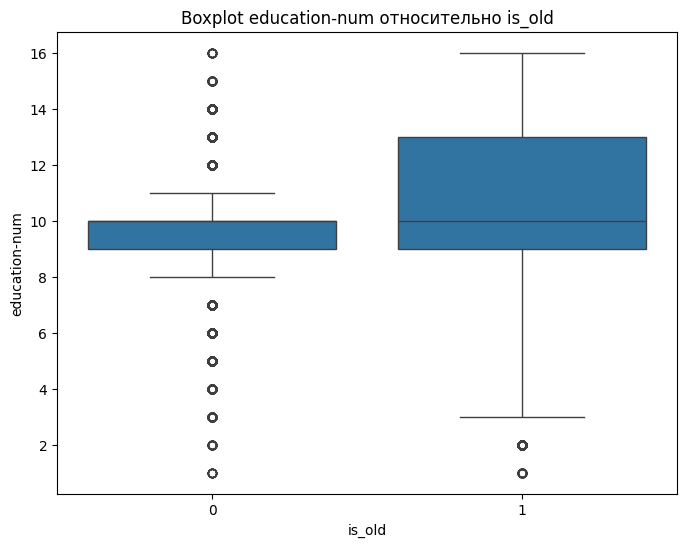

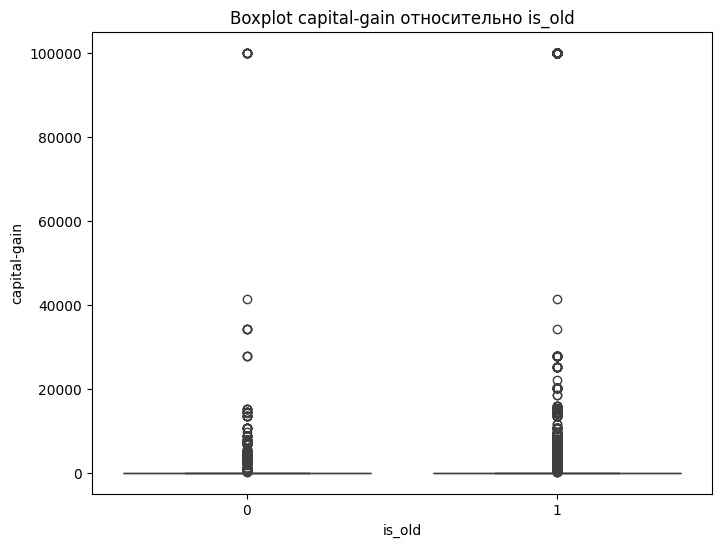

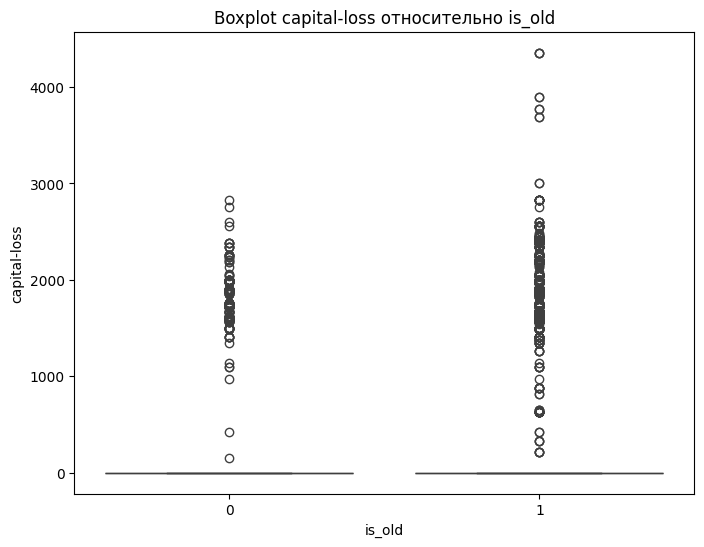

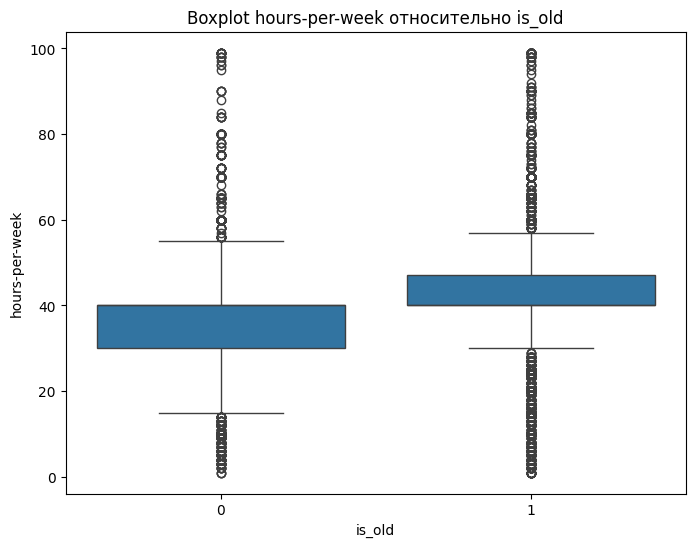

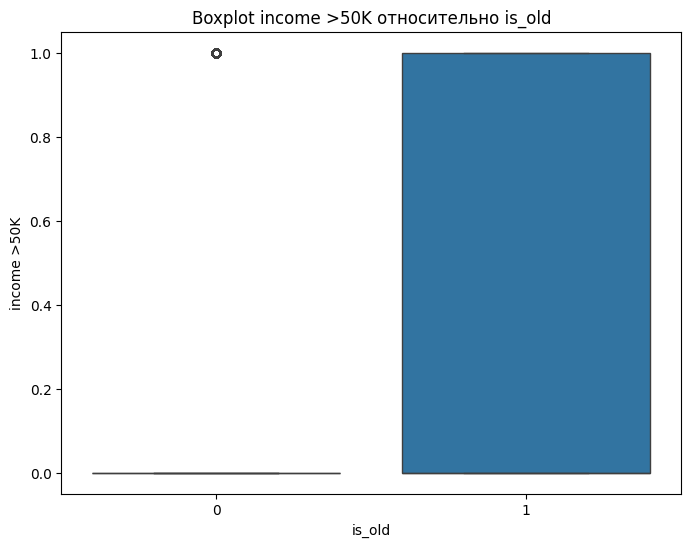

In [256]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_old', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_old')
    plt.show()

education_num относительно is_old: у стариков было больше лет на получение или неполучение образования, у молодых все в рамках периода школы
hours_per_week относительно is_old: у всех работа около 40ч, у выбросов равномерное распределение

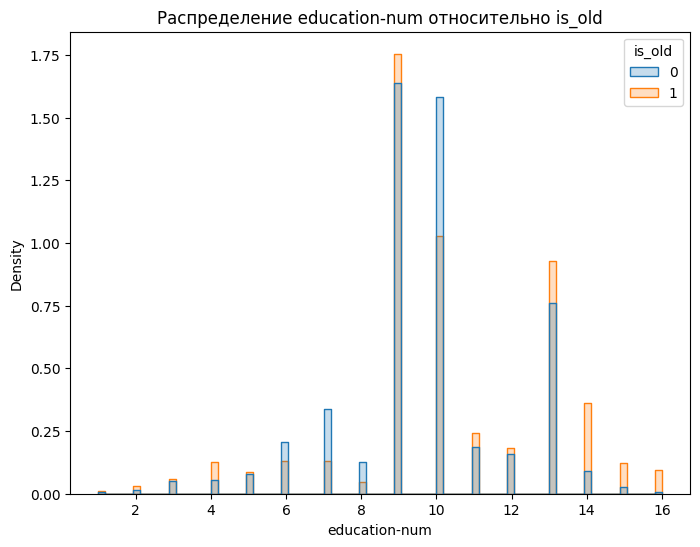

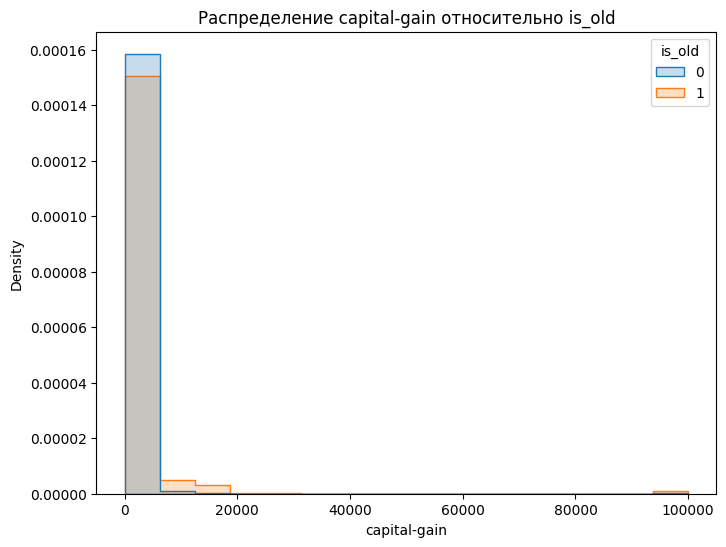

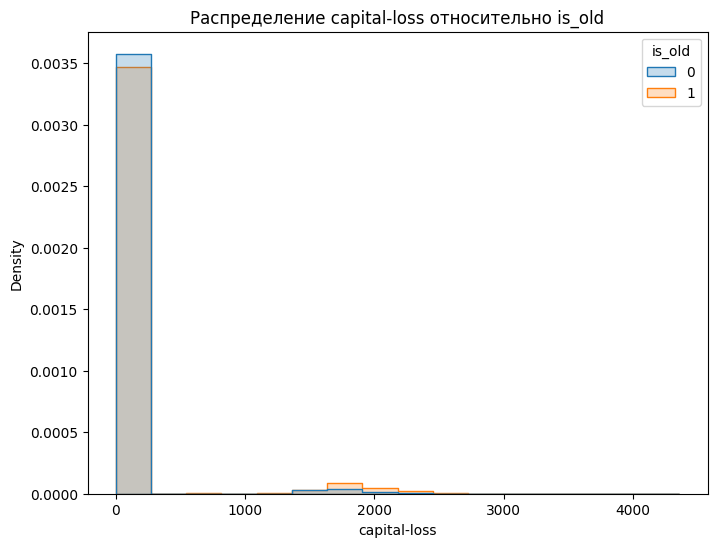

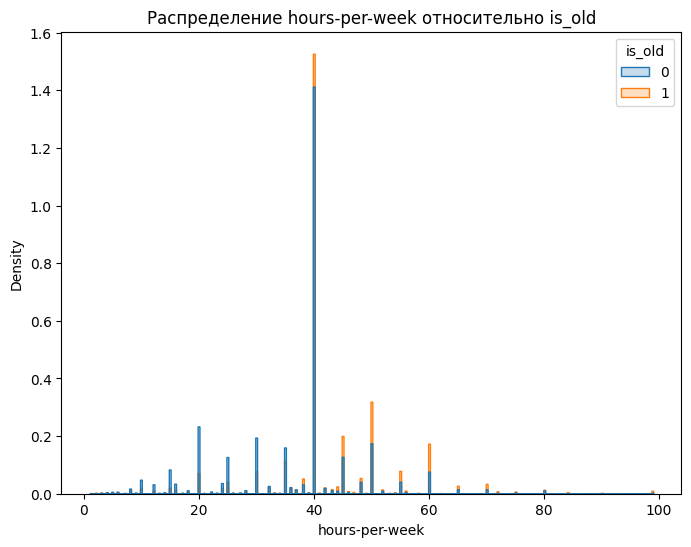

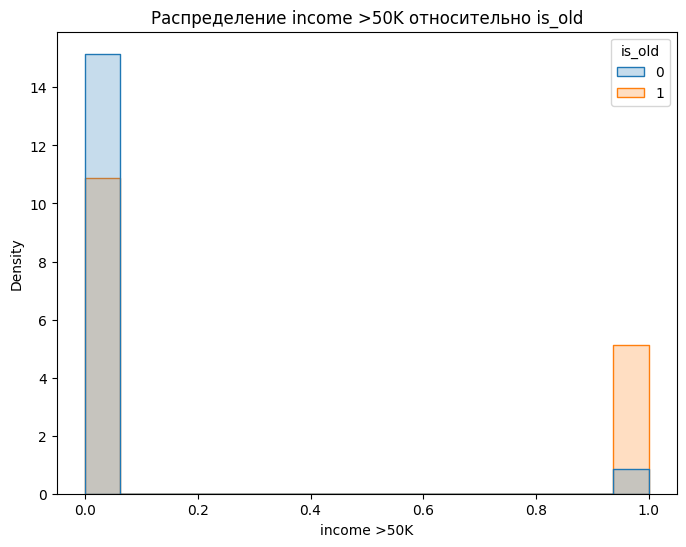

In [257]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_old', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_old')
    plt.show()

Предыдущие описывать не буду (описал в предыдущем пункте).
income от is_old: у стариков зарплаты до 50к меньше, а после 50к больше

⏰ проанализировать график, выделить значимые признаки относительно Y

In [258]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_old')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_numeric

age                                                      \
          count       mean        std   min   25%   50%   75%   max   
is_old                                                                
0        9711.0  23.510349   3.556006  17.0  21.0  24.0  27.0  29.0   
1       22850.0  44.986783  11.054395  30.0  36.0  43.0  52.0  90.0   

       education-num             ... income >50K        is_old                 \
               count       mean  ...         75%  max    count mean  std  min   
is_old                           ...                                            
0             9711.0   9.689836  ...         0.0  1.0   9711.0  0.0  0.0  0.0   
1            22850.0  10.246783  ...         1.0  1.0  22850.0  1.0  0.0  1.0   

                            
        25%  50%  75%  max  
is_old                      
0       0.0  0.0  0.0  0.0  
1       1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [259]:
desc_stats_categorical = df.groupby('is_old')[df.select_dtypes(include=['object']).columns].describe()
desc_stats_categorical

workclass                        education                        \
           count unique      top   freq     count unique      top  freq   
is_old                                                                    
0           8923      8  Private   7675      9711     16  HS-grad  2983   
1          21802      8  Private  15021     22850     16  HS-grad  7518   

       marital-status         ...   race           sex                      \
                count unique  ...    top   freq  count unique   top   freq   
is_old                        ...                                            
0                9711      7  ...  White   8214   9711      2  Male   5725   
1               22850      7  ...  White  19602  22850      2  Male  16065   

       native-country                               
                count unique            top   freq  
is_old                                              
0                9568     40  United-States   8668  
1               22410     41  United-States  20502  

[2 rows x 32 columns]

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [260]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_old')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для education-num:

          count       mean       std  min  25%   50%   75%   max
is_old                                                          
0        9711.0   9.689836  2.209282  1.0  9.0  10.0  10.0  16.0
1       22850.0  10.246783  2.695410  1.0  9.0  10.0  13.0  16.0


Описательная статистика для capital-gain:

          count         mean          std  min  25%  50%  75%      max
is_old                                                                
0        9711.0   262.187828  3176.957073  0.0  0.0  0.0  0.0  99999.0
1       22850.0  1424.210853  8545.854020  0.0  0.0  0.0  0.0  99999.0


Описательная статистика для capital-loss:

          count        mean         std  min  25%  50%  75%     max
is_old                                                             
0        9711.0   46.901452  288.392030  0.0  0.0  0.0  0.0  2824.0
1       22850.0  104.474398  441.650931  0.0  0.0  0.0  0.0  4356.0


Описательная статистика для hours-per-week:

   

In [261]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


workclass                        education                        \
           count unique      top   freq     count unique      top  freq   
is_old                                                                    
0           8923      8  Private   7675      9711     16  HS-grad  2983   
1          21802      8  Private  15021     22850     16  HS-grad  7518   

       marital-status         ...   race           sex                      \
                count unique  ...    top   freq  count unique   top   freq   
is_old                        ...                                            
0                9711      7  ...  White   8214   9711      2  Male   5725   
1               22850      7  ...  White  19602  22850      2  Male  16065   

       native-country                               
                count unique            top   freq  
is_old                                              
0                9568     40  United-States   8668  
1               22410     41  United-States  20502  

[2 rows x 32 columns]

#### 1. **education-num**:
   - **Среднее значение** у людей возрастом больше 30 - 9.68, меньше - 10.2
   - **Разброс (std)** в обеих группах примерно одинаковый (2.209282 и 2.695410), что говорит о схожей вариативности количества образований

#### 2. **capital-gain**:
   - **Среднее значение** у людей возрастом больше 30 - 1424.210853, меньше - 262.187828. Старики зарабатывают лучше
   - **Разброс (std)** у стариков расброс больше

#### 2. **capital-loss**:
   - **Среднее значение** у людей возрастом больше 30 - 104.474398, меньше - 46.901452. Старики теряют больше, но не на столько как зарабатывают
   - **Разброс (std)** у стариков расброс больше, чуть меньше чем в доходах

### Вывод:
На основе представленных данных можно сказать, что старики зарабатывают намного больше

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [262]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K,is_old
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037,0.720308
education-num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154,0.099039
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329,0.071983
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526,0.065364
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689,0.202114
income >50K,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000,0.286926
is_old,0.720308,0.099039,0.071983,0.065364,0.202114,0.286926,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **income >50K education-num (0.335154)**:
   - Старики больше образований 

2. **income >50K и age (0.234037)**:
   - Старики больше зарабатывают

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [264]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income >50K']


In [265]:
# Создаем копию данных
X_processed = X.copy()
# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed,dtype=int, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [266]:
X_processed

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [267]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: []


In [268]:
# Инициализируем scaler
# scaler = MinMaxScaler()

# Применяем нормализацию
# X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [269]:
X_processed

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income >50K_1
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [270]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [271]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8398
Точность на тестовой выборке: 0.8293

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1942
           1       0.87      0.90      0.88      4571

    accuracy                           0.83      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.83      0.83      0.83      6513



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [272]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                               Feature  Coefficient
40        marital-status_Never-married    -2.703221
37    marital-status_Married-AF-spouse    -2.011346
42              marital-status_Widowed     1.917677
58              relationship_Own-child    -1.874074
38   marital-status_Married-civ-spouse    -1.332048
..                                 ...          ...
177                 capital-gain_22040     0.000000
81                   capital-gain_1639     0.000000
78                   capital-gain_1455     0.000000
102                  capital-gain_2538     0.000000
361                  hours-per-week_92     0.000000

[409 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [273]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8348
Отклонение точности: 0.0057


In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

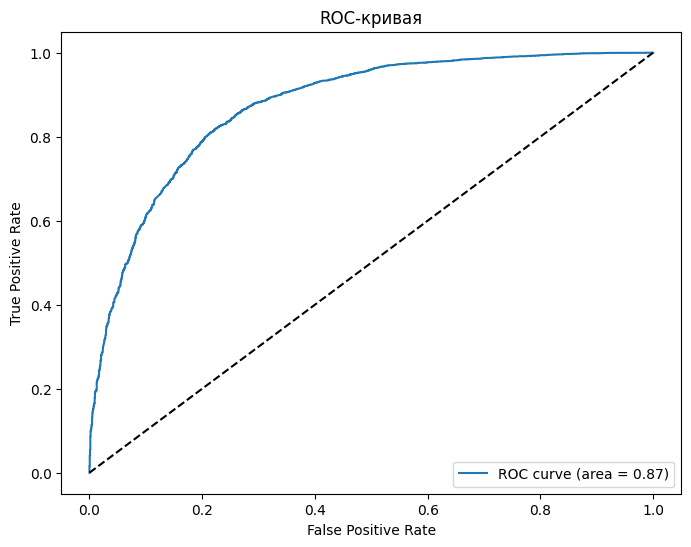

In [275]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---